In [1]:
kk 0

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!kk0:start>^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [2]:
%precision 2
from numpy import random as nr
set_matplotlib_formats('svg')

## 庞大的函数库

### 随机数

随机数

In [3]:
r1 = nr.rand(4, 3)   #0-1之间的随机数
r2 = nr.randn(4, 3)  #符合标准正态分布的随机数
r3 = nr.randint(0, 10, (4,3)) #指定范围内的随机证书
%C r1; r2; r3

         r1                      r2                 r3    
--------------------  -----------------------  -----------
[[0.39, 0.56, 0.12],  [[-1.55,  1.01, -0.01],  [[0, 4, 9],
 [0.07, 0.21, 0.48],   [ 1.06,  0.8 ,  0.57],   [9, 3, 8],
 [0.62, 0.58, 0.34],   [-1.02,  1.71,  0.44],   [2, 7, 1],
 [0.22, 0.55, 0.65]]   [-0.06,  0.43,  1.36]]   [4, 9, 7]]


随机分布

In [4]:
r1 = nr.normal(100, 10, (4, 3)) #符合正态分布的随机数
r2 = nr.uniform(10, 20, (4, 3)) #符合均匀分布的随机数
r3 = nr.poisson(2.0, (4, 3))    #符合泊松分布的随机数
%C r1; r2; r3

            r1                         r2                 r3    
--------------------------  -----------------------  -----------
[[ 87.49,  94.68,  88.02],  [[12.97, 12.14, 17.13],  [[3, 2, 4],
 [ 88.23, 108.89, 121.11],   [10.73, 10.9 , 19.76],   [3, 2, 3],
 [101.32, 113.22,  81.2 ],   [10.46, 19.01, 14.53],   [0, 1, 1],
 [105.64,  87.44, 108.13]]   [15.52, 11.02, 13.95]]   [0, 0, 1]]


随机排序

In [5]:
a = np.array([1, 10, 20, 30, 40])
%P nr.permutation(10); nr.permutation(a)#返回新的数组

 1: [5 6 3 8 7 0 4 9 2 1],     2: [40  1 30 20 10],    


In [6]:
nr.shuffle(a) #对原始数组进行排序
a

array([10, 20, 30,  1, 40])

可重复抽样

In [7]:
a = np.arange(20, dtype=float)
c1 = nr.choice(a, size=(3, 4))
c2 = nr.choice(a, size=(3, 4), replace=False) #不可重复选取
c3 = nr.choice(a, size=(3, 4), p=a / np.sum(a)) # 数字越大抽取的概率越大
%C 5 c1; c2; c3

          c1                         c2                         c3          
----------------------     ----------------------     ----------------------
[[ 8., 12.,  3., 12.],     [[13., 12.,  6., 19.],     [[16.,  6., 15.,  8.],
 [19., 15., 13.,  8.],      [ 2., 16.,  5., 11.],      [ 6., 16., 10.,  8.],
 [12., 11.,  1.,  7.]]      [15.,  4.,  8., 18.]]      [11.,  4.,  9., 15.]]


随机数种子: 种子相同产生的随机数相同

In [8]:
r1 = nr.randint(0, 100, 3)
r2 = nr.randint(0, 100, 3)
nr.seed(42)
r3 = nr.randint(0, 100, 3)
nr.seed(42)
r4 = nr.randint(0, 100, 3)
%C r1; r2; r3; r4

     r1            r2            r3            r4     
------------  ------------  ------------  ------------
[ 4, 46, 60]  [46, 18, 71]  [51, 92, 14]  [51, 92, 14]


### 求和、平均值、方差

**sum()**

In [9]:
nr.seed(42)
a = nr.randint(0,10,size=(2,3))
%C 5 a; np.sum(a); np.sum(a, axis=1); np.sum(a, axis=0)

     a          np.sum(a)     np.sum(a, axis=1)     np.sum(a, axis=0)
-----------     ---------     -----------------     -----------------
[[6, 3, 7],     35            [16, 19]              [10,  9, 16]     
 [4, 6, 9]]                                                          


In [10]:
nr.seed(42)
f = nr.randint(0,10,(2,3,4))
%C 5 f; np.sum(f, axis=(0, 2)); sum([6, 3, 7, 4]+[7, 2, 5, 4])

       f             np.sum(f, axis=(0, 2))     sum([6, 3, 7, 4]+[7, 2, 5, 4])
----------------     ----------------------     ------------------------------
[[[6, 3, 7, 4],      [38, 37, 39]               38                            
  [6, 9, 2, 6],                                                               
  [7, 4, 3, 7]],                                                              
                                                                              
 [[7, 2, 5, 4],                                                               
  [1, 7, 5, 1],                                                               
  [4, 0, 9, 5]]]                                                              


In [11]:
# keepdims参数设置是否保持原数组的维数
%C a; np.sum(a, 1, keepdims=False); np.sum(a, 1, keepdims=True)

     a       np.sum(a, 1, keepdims=False)  np.sum(a, 1, keepdims=True)
-----------  ----------------------------  ---------------------------
[[6, 3, 7],  [16, 19]                      [[16],                     
 [4, 6, 9]]                                 [19]]                     


In [12]:
# keepdims设置为True时, sum()得到的结果可以和原始数组进行广播运算
pa = a / np.sum(a, 1, dtype=float, keepdims=True) * 100
%C pa; pa.sum(1, keepdims=True)

           pa            pa.sum(1, keepdims=True)
-----------------------  ------------------------
[[37.5 , 18.75, 43.75],  [[100.],                
 [21.05, 31.58, 47.37]]   [100.]]                


In [13]:
#  sum()求和时注意查看结果的精度
b = np.full(1000000, 1.1, dtype=np.float32) # 创建一个很大的单精度浮点数数组
%C np.sum(b); np.sum(b,dtype=np.double)

np.sum(b)  np.sum(b,dtype=np.double)
---------  -------------------------
1099999.2  1100000.023841858        


**mean()**

In [14]:
np.mean(a,axis=1) # 默认双精度

array([5.33, 6.33])

**average()**: 有一个权重参数

In [15]:
score = np.array([83, 72, 79])
number = np.array([20, 15, 30])
%P np.average(score, weights=number); np.sum(score * number) / np.sum(number, dtype=float)

 1: 78.615,     2: 78.615,    


**std()**: 计算数组的标准差;  
**var()**: 计算数组的方差;  

`偏样本方差`(ddot=0): $\large s_n^2 = \frac{1}{n} \Sigma_{i=1}^n(y_i-\bar{y})^2$.   
`无偏样本方差`(ddot=1): $\large s_n^2 = \frac{1}{n-1} \Sigma_{i=1}^n(y_i-\bar{y})^2$.  
因为n个数据点的信息量 = (n-1)个数据点的信息量+均值的信息量, 因此, $y_1到y_n$只有(n-1)个信息量;

In [16]:
a = nr.normal(0, 2.0, (100000, 10)) 
v1 = np.var(a, axis=1, ddof=0)
v2 = np.var(a, axis=1, ddof=1)
%P np.mean(v1); np.mean(v2)

 1: 3.603,     2: 4.004,    


* 无偏样本方差 == 总体方差, 偏样本方差 == 正态分布随机变量的最大似然估计;  
* 最大似然估计: 找到一组参数(期望, 方差), 使得所有样本一起发生时概率最大;

In [17]:
def normal_pdf(mean, var, x):
# 计算正态分布的概率密度的函数"
    return 1 / np.sqrt(2 * np.pi * var) * np.exp(-(x - mean) ** 2 / (2 * var))
nr.seed(42)
# 产生一组数据并计算平均值和方差
data = nr.normal(0, 2.0, size=10)                         
mean, var = np.mean(data), np.var(data)                   
# 产生一组方差值,调参
var_range = np.linspace(max(var - 4, 0.1), var + 4, 100)  
# 计算每个数据点的概率密度(0.896,var) 
# mean长度为10,var_range为100,如果加了[:,None], 可广播
p = normal_pdf(mean, var_range[:, None], data) 
# 计算每一行的值, 即所有数据点的概率密度总和
pp = np.product(p, axis=1)

In [18]:
%P mean; var; var_range[:, None].shape; p.shape

 1: 0.896,     2: 1.882,     3: (100, 1),     4: (100, 10),    


偏样本方差位于似然估计曲线(概率-方差曲线)的最大值处

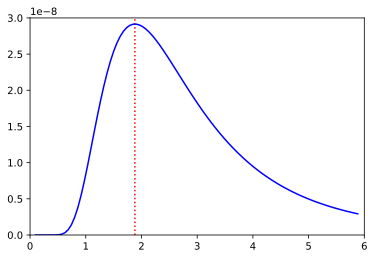

In [19]:
plt.plot(var_range, pp, 'b-')
plt.vlines(var, 0, 3e-8, linestyles=':', colors='r')
plt.xlim(0,6)
plt.ylim(0,3e-8)
plt.show()

### 大小与排序

* min(), max() 都有axis, out, keepdims 等参数;
* minimum(), maximum(): 二元最小值和二元最大值, 用于比较两个数组对应下标处的元素大小, 数组维度不同时需要广播;
* ptp()计算最大值和最小值之间的差值;

In [20]:
a = np.array([1, 3, 5, 7])
b = np.array([2, 4, 6])[:,None]
A, B = np.broadcast_arrays(a,b)
%C 5 A; B; np.maximum(A,B)

      A                  B            np.maximum(A,B)
--------------     --------------     ---------------
[[1, 3, 5, 7],     [[2, 2, 2, 2],     [[2, 3, 5, 7], 
 [1, 3, 5, 7],      [4, 4, 4, 4],      [4, 4, 5, 7], 
 [1, 3, 5, 7]]      [6, 6, 6, 6]]      [6, 6, 6, 7]] 


* **数组平坦化**: 将数组转化为列表, 并且列表的元素仍然是列表

In [21]:
a2 = np.arange(6).reshape(2,3) 
%C 5 a2; a2.tolist(); list(a2)

     a2              a2.tolist()                         list(a2)              
-----------     ----------------------     ------------------------------------
[[0, 1, 2],     [[0, 1, 2], [3, 4, 5]]     [array([0, 1, 2]), array([3, 4, 5])]
 [3, 4, 5]]                                                                    


argmax() 和 argmin() 计算最大值和最小值的下标

In [22]:
# 不指定 axis,返回平坦化之后的下标
nr.seed(42)
a = np.random.randint(0, 10, size=(4, 5))
max_pos = np.argmax(a)
%C 5 a; np.max(a); max_pos

        a             np.max(a)     max_pos
-----------------     ---------     -------
[[6, 3, 7, 4, 6],     9             5      
 [9, 2, 6, 7, 4],                          
 [3, 7, 7, 2, 5],                          
 [4, 1, 7, 5, 1]]                          


In [23]:
# unravel_index()将平坦化下标转化为多维数组的下标: 
# 第一个参数是一位数组的下标, 第二个参数是多维数组的形状
idx = np.unravel_index(max_pos, a.shape)
%C idx; a[idx]

 idx    a[idx]
------  ------
(1, 0)  9     


In [24]:
# 根据`行最值下标`取出`行最值`
rowmax = np.argmax(a, axis=1) # 计算行最值下标(列刻度)
a_rowmax=a[np.arange(a.shape[0]),rowmax] #行刻度-列刻度
%C a; rowmax[:,None]; a_rowmax[:,None]

        a          rowmax[:,None]  a_rowmax[:,None]
-----------------  --------------  ----------------
[[6, 3, 7, 4, 6],  [[2],           [[7],           
 [9, 2, 6, 7, 4],   [0],            [9],           
 [3, 7, 7, 2, 5],   [1],            [7],           
 [4, 1, 7, 5, 1]]   [2]]            [7]]           


1. sort()函数返回新的数组;
1. sort()方法进行原位排序;  
    * axis=-1(default), 沿着最后轴排序;
    * axis=None, 排序之前先进行平坦化;
    * 排序相关的函数和方法可以通过kind参数指定排序算法;  
    * 对于结构数组还可以通过oeder参数指定排序所使用的字段;

In [25]:
%C 5 np.sort(a); np.sort(a, axis=0); np.sort(a, axis=None) 

    np.sort(a)        np.sort(a, axis=0)                        np.sort(a, axis=None)                    
-----------------     ------------------     ------------------------------------------------------------
[[3, 4, 6, 6, 7],     [[3, 1, 6, 2, 1],      [1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 9]
 [2, 4, 6, 7, 9],      [4, 2, 7, 4, 4],                                                                  
 [2, 3, 5, 7, 7],      [6, 3, 7, 5, 5],                                                                  
 [1, 1, 4, 5, 7]]      [9, 7, 7, 7, 6]]                                                                  


argsort(): 返回数组元素被排序之前的下标(简称排序下)

In [26]:
sort_axis0 = np.argsort(a, axis=0)
sort_axis1 = np.argsort(a, axis=1)
%C 5 a; np.sort(a,axis=0); sort_axis0;; \
                        ' '*15; np.sort(a,axis=1); sort_axis1

        a             np.sort(a,axis=0)         sort_axis0   
-----------------     -----------------     -----------------
[[6, 3, 7, 4, 6],     [[3, 1, 6, 2, 1],     [[2, 3, 1, 2, 3],
 [9, 2, 6, 7, 4],      [4, 2, 7, 4, 4],      [3, 1, 0, 0, 1],
 [3, 7, 7, 2, 5],      [6, 3, 7, 5, 5],      [0, 0, 2, 3, 2],
 [4, 1, 7, 5, 1]]      [9, 7, 7, 7, 6]]      [1, 2, 3, 1, 0]]

      ' '*15          np.sort(a,axis=1)         sort_axis1   
-----------------     -----------------     -----------------
'               '     [[3, 4, 6, 6, 7],     [[1, 3, 0, 4, 2],
                       [2, 4, 6, 7, 9],      [1, 4, 2, 3, 0],
                       [2, 3, 5, 7, 7],      [3, 0, 4, 1, 2],
                       [1, 1, 4, 5, 7]]      [1, 4, 0, 3, 2]]


用排序下标计算排序数组: 
* 可以实现对两个相互关联的数组进行排序, 从数组a产生排序下标数组, 然后使用它对数组b进行排序;  

如何创建轴刻度:  
* 给定一个数组, 它的轴刻度是固定的;  
* 轴刻度的形式与数组的形状有关, 不同轴刻度的形状是不同的;

In [27]:
axis0, axis1 = np.ogrid[:a.shape[0], :a.shape[1]]
%C 5 axis0; axis1; a[sort_axis0, axis1]; a[axis0, sort_axis1]

axis0           axis1           a[sort_axis0, axis1]     a[axis0, sort_axis1]
-----     -----------------     --------------------     --------------------
[[0],     [[0, 1, 2, 3, 4]]     [[3, 1, 6, 2, 1],        [[3, 4, 6, 6, 7],   
 [1],                            [4, 2, 7, 4, 4],         [2, 4, 6, 7, 9],   
 [2],                            [6, 3, 7, 5, 5],         [2, 3, 5, 7, 7],   
 [3]]                            [9, 7, 7, 7, 6]]         [1, 1, 4, 5, 7]]   


lexsort()函数: 类似于Excel的多列排序, lexsort()返回排序下标;

In [28]:
names = ["zhang", "wang", "li", "wang", "zhang"]
ages = [37, 33, 32, 31, 36]

# 数据点-特征矩阵; 参数数组的形状为(k,N), 与数据点-特征矩阵互为转置, k是特征的个数, N是数据点的个数;
sample_feature = np.array(list(zip(names,ages)),dtype=np.object)
param_ary = sample_feature.T

# `param_ary[::-1]`: 将二维数组中所有的行倒序排列;
%C sample_feature; param_ary; param_ary[::-1] 

 sample_feature                  param_ary                                param_ary[::-1]              
---------------  ------------------------------------------  ------------------------------------------
[['zhang', 37],  [['zhang', 'wang', 'li', 'wang', 'zhang'],  [[37, 33, 32, 31, 36],                    
 ['wang', 33],    [37, 33, 32, 31, 36]]                       ['zhang', 'wang', 'li', 'wang', 'zhang']]
 ['li', 32],                                                                                           
 ['wang', 31],                                                                                         
 ['zhang', 36]]                                                                                        


In [29]:
# 最后的列为主键, 主键相同时再按其他的键进行排序
idx = np.lexsort( param_ary[::-1]) #先对name排序, name相同时再按年龄排序
%C 5 idx; sample_feature[idx]

      idx           sample_feature[idx]
---------------     -------------------
[2, 3, 1, 4, 0]     [['li', 32],       
                     ['wang', 31],     
                     ['wang', 33],     
                     ['zhang', 36],    
                     ['zhang', 37]]    


想要找出排序之后的前k个元素, 如果a的长度很大, 使用`np.sort(a)[k]`, 会严重降低程序的运行速度;  
* **partition()** 和 **argpartition()**: 
* 首先对数组进行分割, 然后每个部分单独调用sort(或其他的排序算法);  
* 为什么分割后排序时间会减少: 改变了时间复杂度;

sorted函数的时间复杂度为(ch-01)：$O(n \log{n})$  

In [30]:
num, part = 1e5, 10
t1 = num * np.log(num) #单次排序的时间
t2 = part * (num/part) * np.log(num/part) # 将其分成part部分后的排序时间
t2/t1

0.8

In [31]:
nr.seed(0)
r = np.random.randint(10, 1000000, 100000)
%C np.sort(r)[:5]; np.partition(r, 5)[:5] 

      np.sort(r)[:5]         np.partition(r, 5)[:5] 
-------------------------  -------------------------
[ 14,  14,  37,  86, 102]  [ 14,  14,  37,  86, 102]


In [32]:
%%disabled

%timeit np.sort(r)[:5]
%timeit np.sort(np.partition(r, 5)[:5])

>>> 5.56 ms ± 62.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
>>> 934 µs ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

median(): 获得数组的中位数,当数组的长度是偶数时, 返回两个值的平均值

In [33]:
a_median0 = np.median(a, axis=0,keepdims=True)
a_median1 = np.median(a, axis=1, keepdims=True)
%C 5 a; a_median0; a_median1

        a                      a_median0              a_median1
-----------------     ---------------------------     ---------
[[6, 3, 7, 4, 6],     [[5. , 2.5, 7. , 4.5, 4.5]]     [[6.],   
 [9, 2, 6, 7, 4],                                      [6.],   
 [3, 7, 7, 2, 5],                                      [5.],   
 [4, 1, 7, 5, 1]]                                      [4.]]   


percentile(): 计算百分位数, 将数值从小到大排列, 计算处于 p% 位置上的数值 

In [34]:
r = np.abs(np.random.randn(100000))
np.percentile(r, [68.3, 95.4, 99.7]) # 正态随机分布的 1,2,3 倍标准差范围内的数据所占的百分比

array([1.  , 2.  , 2.97])

searchsorted(a, v), 将数组 v 中的元素带到 a 中进行二分搜索, 函数返回要插入的位置, 默认从最左边插入, 可由side参数调节

In [35]:
a = [2, 4, 8, 16, 16, 32]
v = [1, 5, 33, 16]
%C np.searchsorted(a, v); np.searchsorted(a, v, side="right")

np.searchsorted(a, v)  np.searchsorted(a, v, side="right")
---------------------  -----------------------------------
[0, 2, 6, 3]           [0, 2, 6, 5]                       


有两个一维数组 x, y, 找到 y 中的每个元素在 x 中的下标, 如果元素不存在, 将下标设置为-1

In [36]:
x = np.array([3, 5, 7, 1, 9, 8, 6, 10])
y = np.array([2, 1, 5, 10, 100, 6])
# 使用二分法实现
def get_index_searchsorted(x, y):  
    """"使用searchsorted()计算序列y中的元素在序列x中的下标"""
    index = np.argsort(x)  # x的排序下标 [3, 0, 1, 6, 2, 5, 4, 7]
    sorted_x = x[index]    # 排好序的x: 1~10
    sorted_index = np.searchsorted(sorted_x, y)  # y中元素可插入x(已排序)中的地址 [1, 0, 2, 7, 8, 3]
    
    yindex = np.take(index, sorted_index, mode="clip") # 沿着指定轴的索引获取元素, 提供下标越界处理
    mask = x[yindex] != y  # mask == [True, False, False, False,  True, False]
    yindex[mask] = -1    
    return yindex
# 使用字典的方式实现
def get_index_dict(x,y):
    """"使用字典计算序列y中的元素在序列x中的下标"""
    val_idx = {val:idx for idx,val in enumerate(x)}
    yindex = [val_idx.get(v,-1) for v in y]
    return yindex
%C get_index_searchsorted(x, y); get_index_dict(x,y)

get_index_searchsorted(x, y)  get_index_dict(x,y) 
----------------------------  --------------------
[-1,  3,  1,  7, -1,  6]      [-1, 3, 1, 7, -1, 6]


### 统计函数

unique()返回参数数组中所有不同的值, 并按顺序排列

In [37]:
nr.seed(42)
a = np.random.randint(0, 8, 10)
a_unique, index = np.unique(a, return_index=True) # 一并返回结果数组在原始数组中的下标
%C 5 a; a_unique; index; a[index]

              a                         a_unique                index                 a[index]     
------------------------------     ------------------     ------------------     ------------------
[6, 3, 4, 6, 2, 7, 4, 4, 6, 1]     [1, 2, 3, 4, 6, 7]     [9, 4, 1, 2, 0, 5]     [1, 2, 3, 4, 6, 7]


bincount(): 统计数组下标在数组元素中出现的次数;  
* 整数数字0,1,2,可以做下标, 可以做事物类别的标记, 也可以做数组中的元素;
* bincount接收一个数组参数, 同时接收了该数组的下标序列作为参数;

weights(线性系数,归一化因子):  
* 结果是一个数字, 而计算这个数字的量叫做`统计度量`;
* `weights=None`: weights=[1]*len(a), 出现一个下标元素, 统计度量都加1; 
* `weights=[0.1,5,..]`: 给数组中的每个元素一个权重, 但出现一个下标元素, 统计度量可能加0.1,也可能加5;

In [38]:
x = np.array([0  ,   1,   2,   2,   1,   1,   0])
w = np.array([0.1, 0.3, 0.2, 0.4, 0.5, 0.8, 1.2]) 
%C 5 np.bincount(x); np.bincount(x, w); np.bincount(x, w) / np.bincount(x)

np.bincount(x)     np.bincount(x, w)     np.bincount(x, w) / np.bincount(x)
--------------     -----------------     ----------------------------------
[2, 3, 2]          [1.3, 1.6, 0.6]       [0.65, 0.53, 0.3 ]                


**histgram(a, bins, range=None, weights=None, density=Fslse)**: 对一维数组进行直方图统计;   
1. 输入参数:  
    * bins: 将一维数组a分成多少个统计区间; 在`分间`之前需要对原始数据进行排序;   
    * range: 默认值为(a.min(),a.max()), 可以再此区间任意取一个统计范围;
    * density: 
        * 默认False, 使用区间中元素的个数作为统计度量单位;
        * True: 使用区间的概率密度作为统计度量单位;
    * weights: 有效性因子, 对结果进行修正;
1. 返回两个一维数组:
    * hist: 与每个区间一一对应的一个数字, 用于度量统计结果(个数或者概率密度)
    * bin_edges: 区间的端点, 长度比hist多1;

In [39]:
a = np.random.rand(10)
a_sort = np.sort(a)
hist1, bins1 = np.histogram(a, bins=3, range=(0, 1)) #等区间
hist2, bins2 = np.histogram(a, bins=[0, 0.4, 0.8, 1.0]) #设置不等区间
%C a_sort;; bins1; hist1; bins2; hist2

                           a_sort                           
------------------------------------------------------------
[0.02, 0.06, 0.16, 0.18, 0.21, 0.6 , 0.71, 0.83, 0.87, 0.97]

         bins1              hist1           bins2            hist2  
------------------------  ---------  --------------------  ---------
[0.  , 0.33, 0.67, 1.  ]  [5, 1, 4]  [0. , 0.4, 0.8, 1. ]  [5, 2, 3]


#### 示例

`data/height.csv`保存了一系列的年龄身高数据;  
这是一个二维数组, 如何使用histogram进行一维直方图统计? 对年龄做直方图统计, 身高做权重因子;

观察数据点-特征矩阵的结构

In [40]:
d = np.loadtxt("data/height.csv", delimiter=",")
%C 5 d.shape; np.min(d[:, 0]); np.max(d[:, 0]); np.min(d[:, 1]); np.max(d[:, 1])

d.shape      np.min(d[:, 0])     np.max(d[:, 0])     np.min(d[:, 1])     np.max(d[:, 1])
--------     ---------------     ---------------     ---------------     ---------------
(100, 2)     7.1                 19.9                121.8               178.8          


身高做年龄数组的权重，指定权重参数后, histgram()不在返回区间的个数和, 而是返回经权重度量的`个数和`, 这里返回每个年龄区间身高的总和;  
* cnts是每个年龄段的人数;  
* sums时每个年龄段的人的身高总和;
* sums / cnts: 每个年龄段的平均身高;

In [41]:
cnts = np.histogram(d[:, 0], bins=range(7, 21))[0]
sums = np.histogram(d[:, 0], bins=range(7, 21), weights=d[:, 1])[0]
%C cnts;; sums;; sums / cnts

                        cnts                        
----------------------------------------------------
[10,  6,  7,  9,  5, 10,  9,  3, 11,  6,  4, 12,  8]

                                  sums                                  
------------------------------------------------------------------------
[1259.6,  792.4,  964.8, 1294.2,  740.7, 1534.4, 1459.4,  500.6, 1901.2,
 1039.8,  701.1, 2090.3, 1400.6]                                        

                              sums / cnts                               
------------------------------------------------------------------------
[125.96, 132.07, 137.83, 143.8 , 148.14, 153.44, 162.16, 166.87, 172.84,
 173.3 , 175.28, 174.19, 175.07]                                        


### 分段函数

Python的判断表达式: `x = y if condition else z`;  

In [42]:
y,z = 1,0
%P y if y == 1 else z;   y if y != 1 else z

 1: 1.000,     2: 0.000,    


np.where(x,y,z)具有与判断表达式类似的功能;  
如果x,y,z的形状不同, 需要进行广播;

In [43]:
x = np.arange(10) 
np.where(x < 5, x, 9-x)

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

where()计算P61的三角波形

In [44]:
def triangle_wave1(x, c, c0, hc):
    x = x - x.astype(np.int) # 三角波的周期为1，因此只取x坐标的小数部分进行计算
    return np.where(x >= c, 0, np.where(x < c0, x / c0 * hc,(c - x) / (c - c0) * hc))

**select(condlist, choicelist, default)**:   
* 嵌套层数>=两个的时候使用; 
* condilist是自变量列表, choicelist是段函数列表, 两者一一对应.

In [45]:
def triangle_wave2(x, c, c0, hc):
    x = x - x.astype(np.int)
    return np.select([x >= c, x < c0 , True            ], 
                     [0     , x/c0*hc, (c-x)/(c-c0)*hc])

**piecewise(x,condlist, funclist)**:  
* 调用 where()函数和select()函数时将会发生大量的内存分配和释放;  
* 因此当输入数组 x 很大时, 用 piecewise()函数计算分段函数值;  

In [46]:
def triangle_wave3(x, c, c0, hc):
    x = x - x.astype(np.int)
    return np.piecewise(x, [x >= c, x < c0], #condlist 的长度可以比funclist的长度少1 
        [0,  # x>=c 
        lambda x: x / c0 * hc, # x<c0
        lambda x: (c - x) / (c - c0) * hc])  # else

In [47]:
x = np.linspace(0, 2, 10000) 
y1 = triangle_wave1(x, 0.6, 0.4, 1.0)
y2 = triangle_wave2(x, 0.6, 0.4, 1.0)
y3 = triangle_wave3(x, 0.6, 0.4, 1.0)
np.all(y1 == y2), np.all(y1 == y3)

(True, True)

In [48]:
%%disabled

%timeit triangle_wave1(x, 0.6, 0.4, 1.0)
%timeit triangle_wave2(x, 0.6, 0.4, 1.0)
%timeit triangle_wave3(x, 0.6, 0.4, 1.0)

>>>66 µs ± 214 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
...132 µs ± 732 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
...96.3 µs ± 187 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

### 多维数组的操作

#### 使用concatenate连接数组

**concatenate()**:   
* 将带拼接的数组表示成一个序列的形式, 作为它的第一个参数;  
* axis: 待拼接轴或拼接方向, 默认为x轴;
* 可拼接条件: 对所有数组而言, 除了待拼接轴的形状不同外, 其他轴的形状必须相同;  
* 可反应操作: 沿着哪个轴拼接, 就按哪个轴平移;

In [49]:
a = np.arange(1,5); b = np.arange(5,9)
a14 = a[None,:]; a41 = a[:,None]
b14 = b[None,:]; b41 = b[:,None]
%C a; a14; a41; b; b14; b41

     a             a14         a41        b             b14         b41 
------------  --------------  -----  ------------  --------------  -----
[1, 2, 3, 4]  [[1, 2, 3, 4]]  [[1],  [5, 6, 7, 8]  [[5, 6, 7, 8]]  [[5],
                               [2],                                 [6],
                               [3],                                 [7],
                               [4]]                                 [8]]


数组的串联和并联:  
1. 将数组进行串联处理: 点对点连接;   
2. 将数组进行并联处理: 线对线堆叠;  
3. 可以将其看做是一根筷子在二维平面进行平移的结果: 筷式平移只有五种基本形式;

In [50]:
%C 5 np.concatenate((a,b),axis=0); np.concatenate((a14,b14),axis=1); np.concatenate((a41,b41),axis=0);;\
     ' '*25; np.concatenate((a14,b14),axis=0); np.concatenate((a41,b41),axis=1)

np.concatenate((a,b),axis=0)     np.concatenate((a14,b14),axis=1)     np.concatenate((a41,b41),axis=0)
----------------------------     --------------------------------     --------------------------------
[1, 2, 3, 4, 5, 6, 7, 8]         [[1, 2, 3, 4, 5, 6, 7, 8]]           [[1],                           
                                                                       [2],                           
                                                                       [3],                           
                                                                       [4],                           
                                                                       [5],                           
                                                                       [6],                           
                                                                       [7],                           
                                                                       [8

vstack(): 沿着垂直方向堆叠数组;   
hstack(): 沿着水平方向堆叠数组;   
* 可反应操作: 用一支笔近似表示数组的宽窄, 然后让笔沿着v方向或者h方向平移;
* 可拼接条件: 在平移方向上, 两只笔的长度应该相同;

> 1. np.vstack:    
    * This is equivalent to concatenation along the first axis after 1-D arrays of shape `(N,)` have been reshaped to `(1,N)`.
    * 将二维数组沿着第一轴拼接, 如果是一维数组(N,), 先将一维数组变为二维数组(1,N);    
2. np.hstack:     
    * This is equivalent to concatenation along the second axis, except for 1-D arrays where it concatenates along the first axis.    
    * 将二维数组沿着第二轴拼接, 如果是一维数组则沿着第一轴拼接;   

In [51]:
%C 5 np.hstack((a,b)); np.hstack((a14,b14)); np.vstack((a41,b41));;\
        np.vstack((a14,b14)); np.hstack((a41,b41)); np.hstack((np.hstack((a41,b41)),b41))

    np.hstack((a,b))            np.hstack((a14,b14))        np.vstack((a41,b41))
------------------------     --------------------------     --------------------
[1, 2, 3, 4, 5, 6, 7, 8]     [[1, 2, 3, 4, 5, 6, 7, 8]]     [[1],               
                                                             [2],               
                                                             [3],               
                                                             [4],               
                                                             [5],               
                                                             [6],               
                                                             [7],               
                                                             [8]]               

np.vstack((a14,b14))     np.hstack((a41,b41))     np.hstack((np.hstack((a41,b41)),b41))
--------------------     --------------------     -------------------------------------
[[1, 2, 3, 4]

列式堆叠(column_stack):   
* 将参数中所有的列式数组, 都当做输出矩阵的列;
* 可方便的为原始数组添加一列;

行式堆叠(row_stack):   
* 将参数中所有的行式数组, 都当做输出矩阵的行;  
* 可方便的为原始数组添加一行;

In [52]:
%C 5 np.column_stack((a, b)); np.column_stack((a41, b41)); np.column_stack((a14,b14));;\
np.row_stack((a, b)); np.row_stack((a14, b14)); np.row_stack((a41,b41))

np.column_stack((a, b))     np.column_stack((a41, b41))     np.column_stack((a14,b14))
-----------------------     ---------------------------     --------------------------
[[1, 5],                    [[1, 5],                        [[1, 2, 3, 4, 5, 6, 7, 8]]
 [2, 6],                     [2, 6],                                                  
 [3, 7],                     [3, 7],                                                  
 [4, 8]]                     [4, 8]]                                                  

np.row_stack((a, b))     np.row_stack((a14, b14))     np.row_stack((a41,b41))
--------------------     ------------------------     -----------------------
[[1, 2, 3, 4],           [[1, 2, 3, 4],               [[1],                  
 [5, 6, 7, 8]]            [5, 6, 7, 8]]                [2],                  
                                                       [3],                  
                                                       [4],                  
         

#### 使用`np.r_[]`和`np.c_[]`连接数组

1. r_: 将参数数组按0轴进行拼接
2. 索引表达式的切片形式:     
    * `start:stop:step`==np.arange(start,stop,step)的参数; 不包含终点;    
    * `start:stop:stepj`==`np.linspace(start, stop, step, endpoint=1)`的参数; 包含终点;     


3. 索引表达式的`可选字符串`:     
    1. 将一维输出结果变为二维:
        * 'r': (N,)->(1,N); 
        * 'c': (N,)->(N,1);
        * 如果输出本就是二维, 'r','c'结果相同;
    2. 整数字符串;
        * 第一个整数: 规定拼接数组的轴; 
        * 第二个整数: 规定数组序列中每个数组的最小维数;
        * 三个整数: 如果数组序列中某个数组的维度不够, 如何扩维(升级):
            * -1: 在其形状元组的前面添加(1,), (1,)+a1.shape
            * 0: 在其形状元组的后面添加(1,), a1.shape+(1,)

In [53]:
a = np.r_[0, 1:3:1, 3:5:3j]        # 连接切片和标量, 两种切片形式
a16 = np.r_['r', 0, 1:3:1, 3:5:3j] # 将结果表示为y轴刻度
a61 = np.r_['c', 0, 1:3:1, 3:5:3j] # 将结果表示为x轴刻度
%C 5 a; a16; a61

           a                            a16                  a61  
------------------------     --------------------------     ------
[0., 1., 2., 3., 4., 5.]     [[0., 1., 2., 3., 4., 5.]]     [[0.],
                                                             [1.],
                                                             [2.],
                                                             [3.],
                                                             [4.],
                                                             [5.]]


第一个整数的含义: 按哪个轴进行拼接

In [54]:
a = np.arange(3); b = np.arange(3,6); x = np.array([a,b])
%C 5 x; np.r_['0', x, x]; np.r_['1', x, x] 

     x          np.r_['0', x, x]       np.r_['1', x, x]  
-----------     ----------------     --------------------
[[0, 1, 2],     [[0, 1, 2],          [[0, 1, 2, 0, 1, 2],
 [3, 4, 5]]      [3, 4, 5],           [3, 4, 5, 3, 4, 5]]
                 [0, 1, 2],                              
                 [3, 4, 5]]                              


第二个整数表明每个参数数组的维数至少是二维, 对低于二维的数组进行扩维;  

第三个整数则指明了扩维的方式:
* 0表示后式扩维: a,b的shape由 (3,)=>(3,1)
* -1表示前式扩维: a,b的shape由 (3,)=>(1,3)

In [55]:
%C a; b; np.r_['0',a,b]; np.r_['0,2,0',a,b]; np.r_['0,2,-1',a,b]; np.r_['1,2,0',a,b]

    a          b        np.r_['0',a,b]    np.r_['0,2,0',a,b]  np.r_['0,2,-1',a,b]  np.r_['1,2,0',a,b]
---------  ---------  ------------------  ------------------  -------------------  ------------------
[0, 1, 2]  [3, 4, 5]  [0, 1, 2, 3, 4, 5]  [[0],               [[0, 1, 2],          [[0, 3],          
                                           [1],                [3, 4, 5]]           [1, 4],          
                                           [2],                                     [2, 5]]          
                                           [3],                                                      
                                           [4],                                                      
                                           [5]]                                                      


np.c_== `np.r_['-1,2,0', index expression]`    
* 将二维数组沿着最后一个轴(第二轴)进行拼接;    
* 如果是一维数组, 先将一维数组变为二维数组(按照后式扩维法): 将一维数组快速变为列矢量(二维);

In [56]:
npc = np.c_[ np.array([a]), 0, 0, np.array([b]) ] #四个数组都是二维行向量
%C 5 a;b; np.c_[a]; np.c_[a,b]; npc

    a             b         np.c_[a]     np.c_[a,b]                npc            
---------     ---------     --------     ----------     --------------------------
[0, 1, 2]     [3, 4, 5]     [[0],        [[0, 3],       [[0, 1, 2, 0, 0, 3, 4, 5]]
                             [1],         [1, 4],                                 
                             [2]]         [2, 5]]                                 


np.c_[] 对象也可以按列连接数组

In [57]:
a = np.arange(1,5); b = np.arange(5,9)
%C 5 a; a14; a41; b; b14; b41

     a                a14            a41           b                b14            b41 
------------     --------------     -----     ------------     --------------     -----
[1, 2, 3, 4]     [[1, 2, 3, 4]]     [[1],     [5, 6, 7, 8]     [[5, 6, 7, 8]]     [[5],
                                     [2],                                          [6],
                                     [3],                                          [7],
                                     [4]]                                          [8]]


使用`r_[]对象`进行筷式平移

In [58]:
%C 5 np.r_[a,b]; np.r_['1', a14, b14]; np.r_[a41,b41];;\
np.r_['0',a14,b14]; np.r_['1',a41,b41]; np.r_['0,2,-1',a,b]; np.r_['1,2,0',a,b]

       np.r_[a,b]               np.r_['1', a14, b14]        np.r_[a41,b41]
------------------------     --------------------------     --------------
[1, 2, 3, 4, 5, 6, 7, 8]     [[1, 2, 3, 4, 5, 6, 7, 8]]     [[1],         
                                                             [2],         
                                                             [3],         
                                                             [4],         
                                                             [5],         
                                                             [6],         
                                                             [7],         
                                                             [8]]         

np.r_['0',a14,b14]     np.r_['1',a41,b41]     np.r_['0,2,-1',a,b]     np.r_['1,2,0',a,b]
------------------     ------------------     -------------------     ------------------
[[1, 2, 3, 4],         [[1, 5],               [[1, 2, 3, 4],          [

#### 数组分割和调序

split(), array_split():  
* 将一个数组沿着指定轴分成多个数组;  
* 指定切分轴上的切分点下标, 切分点是数组中的下标, 相当于一把刀的位置, 可以在该处将数组切开;

把随机数 a 切分为多个数组: 保证每个数组的元素都是升序排列的;  
首先计算切分点坐标:

In [59]:
nr.seed(42)
a = nr.randint(0, 10, 12)
# diff和nonzero获得的是每个升序片段的最后一个元素的下标; 
#返回一个元组, 其第一个元素是一个数组
idx_tuple = np.nonzero(np.diff(a)<0) 
# 切分点为每个片段第一个元素的下标;
#不是第一个数值加1, 而是一个数组加1
idx = idx_tuple[0] + 1                 
%C a; idx_tuple; idx

                 a                                  idx_tuple                         idx         
------------------------------------  --------------------------------------  --------------------
[6, 3, 7, 4, 6, 9, 2, 6, 7, 4, 3, 7]  (array([0, 2, 5, 8, 9], dtype=int64),)  [ 1,  3,  6,  9, 10]


根据切分点或者分割个数切割数组;  
第二个参数是整数时, 表示分组的个数,split()只能平均分组, array_split()尽可能的平均分组;

In [60]:
%C np.split(a,idx); np.split(a,6); np.array_split(a,5)

 np.split(a,idx)     np.split(a,6)   np.array_split(a,5)
------------------  ---------------  -------------------
[array([6]),        [array([6, 3]),  [array([6, 3, 7]), 
 array([3, 7]),      array([7, 4]),   array([4, 6, 9]), 
 array([4, 6, 9]),   array([6, 9]),   array([2, 6]),    
 array([2, 6, 7]),   array([2, 6]),   array([7, 4]),    
 array([4]),         array([7, 4]),   array([3, 7])]    
 array([3, 7])]      array([3, 7])]                     


transpote(), 和swapaxes()用于修改轴的顺序;  
参数`axes`代表原始轴的新顺序;  
1. 将原始坐标系及其离散点固定, 只是单纯的把原先的y轴当成0轴, 原先的z轴当成1轴, 原先的x轴当成2轴;  
1. 0,1,2轴坐标系不变, 离散点不变, 只是观察数据的方向由(x,y,z), 变为了(y,z,x), zOx位于底面, y轴垂直于底面;
    * 令y=0:
        * z=0,x=0,12;  
        * z=1,x=1,13;
        * z=2,x=2,14;
        ...
    * 令y=1:
        * z=0,x=4,16;
        * z=1,x=5,17;    

In [61]:
a234 = np.arange(24).reshape(2,3,4)      # 012
a342 = np.transpose(a234, axes=(1,2,0))  # 120
a243 = np.swapaxes(a234,1,2)
%C 5 a234; a342; a243 #将三维数组中的每个二维数组转置

        a234                 a342         a243 #将三维数组中的每个二维数组转置
--------------------     ------------     ---------------------
[[[ 0,  1,  2,  3],      [[[ 0, 12],      [[[ 0,  4,  8],      
  [ 4,  5,  6,  7],        [ 1, 13],        [ 1,  5,  9],      
  [ 8,  9, 10, 11]],       [ 2, 14],        [ 2,  6, 10],      
                           [ 3, 15]],       [ 3,  7, 11]],     
 [[12, 13, 14, 15],                                            
  [16, 17, 18, 19],       [[ 4, 16],       [[12, 16, 20],      
  [20, 21, 22, 23]]]       [ 5, 17],        [13, 17, 21],      
                           [ 6, 18],        [14, 18, 22],      
                           [ 7, 19]],       [15, 19, 23]]]     
                                                               
                          [[ 8, 20],                           
                           [ 9, 21],                           
                           [10, 22],                           
                           [11, 23]]]   

In [62]:
kk 4

*********************************************!kk4:pass>*********************************************


#### 示例

将多个缩略图拼接成一个大图: 理解多维数组中变换轴顺序的应用

In [63]:
%%disabled
import glob
from cv2 import imread, imwrite
imgs = []

for fn in glob.glob("thumbnails/*.png"):
    imgs.append(imread(fn, -1))
    
%P imgs[0].shape

img = np.concatenate(imgs, 0)
img.shape

img1 = img.reshape(6, 5, 90, 160, 3)
img1[0, 1].shape

img2 = img1.swapaxes(1, 2).reshape(540, 800, 3)

img = np.concatenate(imgs, 0)

img3 = img.reshape(5, 6, 90, 160, 3) \
          .transpose(1, 2, 0, 3, 4)  \
          .reshape(540, 800, 3)

img = np.concatenate(imgs, 0)
img1 = img.reshape(6, 5, 90, 160, 3)
mask = np.ones(img1.shape[:-1], dtype=bool) 
mask[:, :, 2:-2, 2:-2] = False              
img1[mask] = 230                            
img4 = img1.swapaxes(1, 2).reshape(540, 800, 3)

# 使用操作多维数组的函数拼接多幅缩略图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.imshow(img2[:, :, ::-1])
ax2.imshow(img4[:, :, ::-1])
ax1.axis(False)
ax2.axis(False)
fig.subplots_adjust(0, 0, 1, 1, 0.02, 0)
plt.show(fig)

### 多项式函数

np.poly1d(a, r=False, variable=None), 根据系数数组创建多项式函数:  
* a[0]是最高次项的系数, a[-1]是常数项的系数;
* `r=True`: 把数组中的元素当做多项式的根值创建多项式;
* `variable`: 自变量的表示符号, 默认为'x';

np.poly1d()的返回值是一个多项式函数(多项式对象)

In [64]:
a = np.array([1.0, 0, -2, 1])
p = np.poly1d(a)
print(p); p(range(5))

   3
1 x - 2 x + 1


array([ 1.,  0.,  5., 22., 57.])

多项式函数与数组的运算: 相当于将数组先变成函数然后再参与运算

In [65]:
print( p + [-1, 1, 0, 0]) # 和 p + np.poly1d([-2, 1]) 相同

   2
1 x - 2 x + 1


In [66]:
p * p # 两个3次多项式相乘得到一个6次多项式

poly1d([ 1.,  0., -4.,  2.,  4., -4.,  1.])

多项式的除法返回两个多项式: 分别表示商式和余式

In [67]:
p / [1, 1]

(poly1d([ 1., -1., -1.]), poly1d([2.]))

In [68]:
p == np.poly1d([ 1., -1., -1.]) * [1,1] + 2 # 商式和被除数相乘再加上余数等于原式

True

多项式函数的微分: deriv();  
多项式函数的积分: integ();

In [69]:
%C 5 p.deriv(); p.integ(); p.integ().deriv() == p

       p.deriv()                             p.integ()                      p.integ().deriv() == p
-----------------------     -------------------------------------------     ----------------------
poly1d([ 3.,  0., -2.])     poly1d([ 0.25,  0.  , -1.  ,  1.  ,  0.  ])     True                  


计算多项式函数的根: roots();

In [70]:
r = np.roots(p)
r

array([-1.62,  1.  ,  0.62])

In [71]:
p(r) # 将根带入多项式计算，得到的值近似为0

array([2.33e-15, 4.44e-16, 1.11e-16])

poly 函数可以将根转换回多项式的系数

In [72]:
np.poly(r)
# np.poly1d(r, r=True)

array([ 1.00e+00, -7.77e-16, -2.00e+00,  1.00e+00])

numpy中与多项式相关的函数:

In [73]:
col 4 dir2(np,patterns=['poly*'])

poly       |poly1d  |polyadd |polyder |
polydiv    |polyfit |polyint |polymul |
polynomial |polysub |polyval |


np.polymul(): 计算多项式的乘积;  
np.polyval(): 计算多项式函数的值;   

In [74]:
%C np.polymul([1,1],[1,1]); np.poly1d([1,1])*[1,1]

np.polymul([1,1],[1,1])  np.poly1d([1,1])*[1,1]
-----------------------  ----------------------
[1, 2, 1]                poly1d([1, 2, 1])     


np.polyfit(): 多项式拟合;     

In [75]:
np.set_printoptions(suppress=True, precision=4)

In [76]:
x = np.linspace(-np.pi / 2, np.pi / 2, 1000)
y = np.sin(x)  

for deg in [3, 5, 7]: # 阶数
    a = np.polyfit(x, y, deg)  
    error = np.abs(np.polyval(a,x) - y)  
    print("max error of degree {}: {:.5f}".format( deg, np.max(error) ))

max error of degree 3: 0.00895
max error of degree 5: 0.00016
max error of degree 7: 0.00000


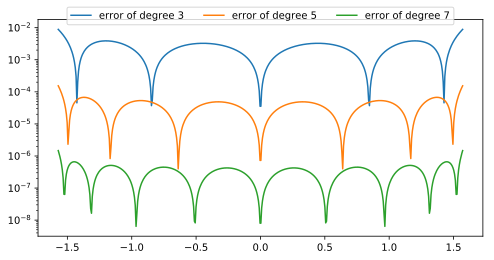

In [78]:
#不同阶数的多项式近似正弦函数时的误差
plt.figure(figsize=(8, 4))
x = np.linspace(-np.pi / 2, np.pi / 2, 500)
y = np.sin(x)
for deg in [3, 5, 7]:
    a = np.polyfit(x, y, deg)
    error = np.abs(np.polyval(a, x) - y)
    plt.semilogy(x, error, label="error of degree {}".format(deg))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08),ncol=3, fancybox=True)
plt.axis('tight');
plt.show()

### 多项式函数类

**np.polynomial**模块提供了更丰富的多项式函数类:  
* Polynomial, Chebyshev, Legendre 等. 
* 多项式系数按照幂次从小到大的顺序排列;

In [79]:
from numpy.polynomial import Polynomial, Chebyshev, Legendre
p = Polynomial([1, -2, 0, 1])
p(2.0)

5.0

Polynomial对象的方法

In [80]:
# 多项式函数的一阶导数
p.deriv()

Polynomial([-2.,  0.,  3.], domain=[-1.,  1.], window=[-1.,  1.])

切比雪夫多项式是一个正交多项式序列$T_i(x)$, 可以通过`Chebyshev.basis(i)`获得;  
一个n次多项式可以表示为多个切比雪夫多项式的加权和: $\large p(x) = \sum_{i=0}^n c_i T_i(x)$

convert()方法可以使多项式对象在不同的多项式类中相互转换:

In [81]:
#  T4(x) = 1-8x^2+8x^4
Chebyshev.basis(4).convert(kind=Polynomial)

Polynomial([ 1.,  0., -8.,  0.,  8.], domain=[-1.,  1.], window=[-1.,  1.])

In [82]:
# T4(x) = 1-8x^2+8x^4
print("在Chebyshev类中的形式: ", Chebyshev.basis(4))
print("在Polynomial类中的形式: ", Chebyshev.basis(4).convert(kind=Polynomial))

在Chebyshev类中的形式:  cheb([0. 0. 0. 0. 1.])
在Polynomial类中的形式:  poly([ 1.  0. -8.  0.  8.])


绘制0-4阶切比雪夫多项式的函数图像

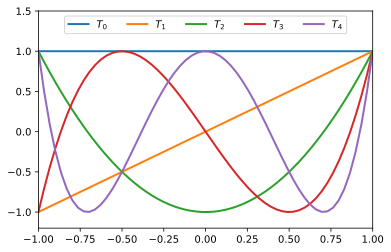

In [83]:
x = np.linspace(-1, 1, 60)
for i in range(5):
    ax = plt.plot(x, Chebyshev.basis(i)(x), '-', lw=2, label="$T_%d$" % i)
plt.xlim(-1, 1)
plt.ylim(-1.2, 1.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=5, fancybox=True);

**切比雪夫节点**: 切比雪夫多项式的根;   
* 可以用于多项式插值, 相应的插值多项式能最大限度的降低龙格现象(数据边缘的震荡现象);

In [84]:
def f(x):
    return 1.0 / ( 1 + 25 * x**2)

n = 11
x1 = np.linspace(-1, 1, n)      # 等差数列取点
x2 = Chebyshev.basis(n).roots() # 按切比雪夫节点取点
xd = np.linspace(-1, 1, 200)    # 所有函数的自变量范围

# 用两种取样点分别对f(x)进行多项式插值
# n个数据最多只能拟合到n-1阶
p1 = Chebyshev.fit(x1, f(x1), n - 1, domain=[-1, 1]) 
p2 = Chebyshev.fit(x2, f(x2), n - 1, domain=[-1, 1])

print( "采用等距取样时多项式的误差: {:.3f}".format(abs(p1(xd) - f(xd)).max() ))
print( "采用切比雪夫取样时多项式的误差: {:.3f}".format(abs(p2(xd) - f(xd)).max() ))

采用等距取样时多项式的误差: 1.916
采用切比雪夫取样时多项式的误差: 0.109


等距取样和切比雪夫取样的误差可视化

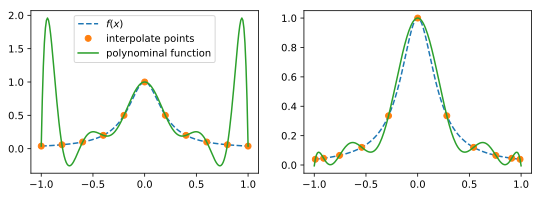

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
# 等距离取点得到的多项式函数
ax1.plot(xd, f(xd), "--", label=u"$f(x)$")
ax1.plot(x1, f(x1), "o", label="interpolate points")
ax1.plot(xd, p1(xd), label="polynominal function")
ax1.legend()
# 切夫雪比节点取点得到的多项式和函数
ax2.plot(xd, f(xd), "--")
ax2.plot(x2, f(x2), "o")
ax2.plot(xd, p2(xd))
plt.show()

在使用多项式逼近函数时, 使用切比雪夫多项式进行插值的误差比一般多项式要小的多;  
 在切比雪夫节点处离散函数g(x), 然后使用切比雪夫多项式和普通多项式拟合这些离散点, 从而逼近g(x):

In [86]:
def g(x):
    x = (x - 1) * 5
    return np.sin(x**2) + np.sin(x)**2

n = 100
x = Chebyshev.basis(n).roots()
xd = np.linspace(-1, 1, 1000)

p_g = Polynomial.fit(x, g(x), n - 1, domain=[-1, 1]) # 使用切比雪夫多项式进行拟合; n-1阶
c_g = Chebyshev.fit(x, g(x), n - 1, domain=[-1, 1])  # 使用普通多项式进行拟合; n-1阶

print( "Max Polynomial Error: {:.3f}".format(abs(g(xd) - p_g(xd)).max() ))
print( "Max Chebyshev Error: {:.3f}".format(abs(g(xd) - c_g(xd)).max() ))

Max Polynomial Error: 1.195
Max Chebyshev Error: 0.000


C:\Users\tfliu\Anaconda3\lib\site-packages\numpy\polynomial\_polybase.py:798: RankWarning: The fit may be poorly conditioned
  res = cls._fit(xnew, y, deg, w=w, rcond=rcond, full=full)


Chebyshev拟合与Polynomial拟合的对比

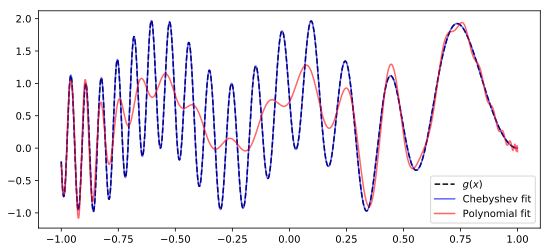

In [87]:
plt.figure(figsize=(9, 4))

plt.plot(xd, g(xd), "k--", label="$g(x)$")
plt.plot(xd, c_g(xd), "b-", alpha=0.6, label=u"Chebyshev fit")
plt.plot(xd, p_g(xd), "r-", alpha=0.6, label=u"Polynomial fit")

plt.legend(loc="best");

trim(): 
* 在保证进度的条件下, 自动的选择最小的多项式阶数;
* `tol`: 尾部精度控制;

In [88]:
c_trimed = c_g.trim(tol=0.05) 
# 所需的最少阶数; 使用68阶时的误差; 
%P c_trimed.degree(); abs(g(xd) - c_trimed(xd)).max()

 1: 68.000,     2: 0.091,    


将函数h(x)等视为19阶切比雪夫多项式

In [89]:
def h(x):
    x = 5 * x
    return np.exp(-x**2 / 10)

n = 20
x = Chebyshev.basis(n).roots()
c_h = Chebyshev.fit(x, h(x), n - 1, domain=[-1, 1])
print( "Max Chebyshev Error:", abs(h(xd) - c_h(xd)).max() )

Max Chebyshev Error: 1.6654415624373087e-09


计算两条曲线(c_g和c_h)在[-0.5, 0.5]之间的所有交点

In [90]:
c_diff = c_g - c_h
roots = c_diff.roots()
real_roots = roots[roots.imag == 0].real # 取出复数数组中所有的实数元素
print("零点处的函数值大概等于0: ", np.allclose(c_diff(real_roots), 0))

零点处的函数值大概等于0:  True


两个多项式的交点: f_diff()函数的零点

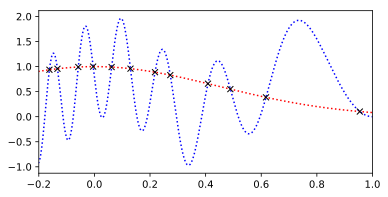

In [91]:
plt.figure(figsize=(6, 3))
plt.plot(xd, g(xd), 'b:')
plt.plot(xd, h(xd), 'r:')
plt.plot(real_roots, h(real_roots), "kx", markeredgewidth=1)
plt.xlim(-.2,1)
plt.show()

切比雪夫多项式在区间[-1,1]上为正交多项式, 只有在该区间上才能对目标函数进行离散, 为了对任何区域的目标函数进行离散, 需要对自变量的区间进行平移和缩放,  domain参数指定离散点的x轴区间, 在通过basis()方法创建Tn(x)和调用fit方法进行拟合时, 都需要设置相同的domain参数;

In [93]:
def g2(x): return np.sin(x**2) + np.sin(x)**2
n = 100
x = Chebyshev.basis(n, domain=[-10, 0]).roots() 
xd = np.linspace(-10, 0, 1000)
c_g2 = Chebyshev.fit(x, g2(x), n - 1, domain=[-10, 0]) 
abs(g2(xd) - c_g2(xd)).max() 

6.475750602419339e-09

### 各种乘积运算

多元素积: 多个元素参与的乘积;  
1. dot(): 矩阵乘; 可当做一维向量的点积; 
1. inner(): 内积; 可当做一维向量的点积;
1. outter(): 外积; 不是向量叉积;
1. tesordot(): 张量积;
1. cross(): 两个向量的叉积;

矩阵的乘积运算

In [94]:
a = np.array([1, 2, 3])
%C a[:, None]; a[None, :]

a[:, None]   a[None, :]
----------  -----------
[[1],       [[1, 2, 3]]
 [2],                  
 [3]]                  


两个多维数组的矩阵乘运算: $$dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])$$

* `乘积运算的必要条件`: 数组a的最后一个轴的长度, 必须等于数组b的倒数第二个轴的长度;  
* `结果数组的形状`: 在数组a的shape元组中挖去最后一个轴的长度, 在数组b的shape元组中挖去倒数第二个轴的长度, 然后将两个shape元组相加, 便是结果数组的shape元组;
* 可反应操作: 将第一个数组的最后一轴乘以第二个数组的最后一轴, 将结果放置在第一个数组的切片框

In [121]:
a = np.arange(3*4*5*6).reshape((3,4,5,6))
b = np.arange(3*4*5*6)[::-1].reshape((5,4,6,3))
c = a.dot(b)
c.shape

(3, 4, 5, 5, 4, 3)

三维数组相乘: 

In [120]:
nr.seed(24)
a = np.arange(12).reshape(2, 3, 2)
b = nr.randint(0,3,(2,2,3))
c = np.dot(a, b)
%C 5 a; b; c; c.shape

     a                 b                   c                c.shape   
------------     -------------     ------------------     ------------
[[[ 0,  1],      [[[2, 0, 1],      [[[[ 1,  1,  0],       (2, 3, 2, 3)
  [ 2,  3],        [1, 1, 0]],        [ 2,  1,  1]],                  
  [ 4,  5]],                                                          
                  [[0, 2, 1],        [[ 7,  3,  2],                   
 [[ 6,  7],        [2, 1, 1]]]        [ 6,  7,  5]],                  
  [ 8,  9],                                                           
  [10, 11]]]                         [[13,  5,  4],                   
                                      [10, 13,  9]]],                 
                                                                      
                                                                      
                                    [[[19,  7,  6],                   
                                      [14, 19, 13]],                  
      

inner(): 第一个数组的最后一轴乘以第二个数组的最后一轴;

$$inner(a, b)[i, j, k, m] = sum(a[i, j, :) * b[k, m, :]$$.   

In [125]:
nr.seed(24)
a = np.arange(12).reshape(2, 3, 2)
b = nr.randint(0,3,(2,3,2))
c = np.inner(a, b)
%C 5 a; b; c; c.shape

     a               b                  c                c.shape   
------------     ----------     ------------------     ------------
[[[ 0,  1],      [[[2, 0],      [[[[ 0,  1,  0],       (2, 3, 2, 3)
  [ 2,  3],        [1, 1],         [ 2,  2,  1]],                  
  [ 4,  5]],       [1, 0]],                                        
                                  [[ 4,  5,  2],                   
 [[ 6,  7],       [[0, 2],         [ 6,  8,  5]],                  
  [ 8,  9],        [1, 2],                                         
  [10, 11]]]       [1, 1]]]       [[ 8,  9,  4],                   
                                   [10, 14,  9]]],                 
                                                                   
                                                                   
                                 [[[12, 13,  6],                   
                                   [14, 20, 13]],                  
                                                

outter(a,b): 计算两个一维数组的外积;   
* 只对一维数组进行运算, 如果传入的是多维数组, 先将它平坦化为一维数组;  
* 将两个一维数组广播为两个二维数组, 然后计算对应元素的乘积;  

可操作性: 将数组a扩维为一个0轴刻度, 将数组b扩维为一个1轴刻度;

In [130]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6, 7])
a0 = np.r_['c',a]  # 将一维数组表示为二维0轴刻度
b1 =  np.r_['r',b] # 将一维数组表示为二维1轴刻度
%C 5 np.outer(a, b); a0; b1; np.dot(a0,b1)

  np.outer(a, b)         a0            b1             np.dot(a0,b1)   
------------------     -----     --------------     ------------------
[[ 4,  5,  6,  7],     [[1],     [[4, 5, 6, 7]]     [[ 4,  5,  6,  7],
 [ 8, 10, 12, 14],      [2],                         [ 8, 10, 12, 14],
 [12, 15, 18, 21]]      [3]]                         [12, 15, 18, 21]]


张量积 tensordot() 将数组 a,b 指定轴上的对应元素相乘并求和

In [131]:
np.random.seed(0)
a = np.random.randint(0,5,size=(3, 4))
b = np.random.randint(0,5,size=(4, 5))

c1 = np.tensordot(a, b, axes=[[1], [0]]) 
c2 = np.tensordot(a, b, axes=1) # a 的后一个轴与 b 的前一个轴          
c3 = np.dot(a, b)
c4 = np.tensordot(a, b, axes=[[-1], [-2]]) # a的最后轴,b的倒数第二轴

In [132]:
%C a; b

      a                 b        
--------------  -----------------
[[4, 0, 3, 3],  [[2, 1, 0, 1, 1],
 [3, 1, 3, 2],   [0, 1, 4, 3, 0],
 [4, 0, 0, 4]]   [3, 0, 2, 3, 0],
                 [1, 3, 3, 3, 0]]


In [133]:
%C c1; c2

          c1                      c2          
----------------------  ----------------------
[[20, 13, 15, 22,  4],  [[20, 13, 15, 22,  4],
 [17, 10, 16, 21,  3],   [17, 10, 16, 21,  3],
 [12, 16, 12, 16,  4]]   [12, 16, 12, 16,  4]]


In [134]:
%C c3; c4

          c3                      c4          
----------------------  ----------------------
[[20, 13, 15, 22,  4],  [[20, 13, 15, 22,  4],
 [17, 10, 16, 21,  3],   [17, 10, 16, 21,  3],
 [12, 16, 12, 16,  4]]   [12, 16, 12, 16,  4]]


### 广义ufunc函数

> NumPy中的线性代数模块`linalg`中提供的函数大都为广义ufunc函数。在SciPy中也提供了线性代数模块`linalg`，但其中的函数都是一般函数，只能对单个矩阵进行计算

将单个矩阵的运算运用到整个数组之上的函数叫做 gufunc

In [ ]:
a = np.random.rand(10, 20, 3, 3) #产生10x20个3x3矩阵
a_inv = np.linalg.inv(a) # np.linalg.inv()是gufunc 对200个3x3矩阵求逆
a_inv.shape # 返回数组的形状和原始数组的形状相同

In [ ]:
i, j = 3, 4 # 第四个三维数组, 第五个二维数组
np.allclose(np.dot(a[i, j], a_inv[i, j]), np.eye(3))

np.linalg.inv(a) gufunc 求逆
np.linalg.det(a) gufunc 求行列式

In [ ]:
a_det = np.linalg.det(a) # 所有MM方阵替换成了它的det值
a_det.shape

对 10000*10 的数据集进行二次函数拟合

In [ ]:
n = 10000
np.random.seed(0)
beta = np.random.rand(n, 3) 
x = np.random.rand(n, 10)
y = beta[:,2, None] + x*beta[:, 1, None] + x**2*beta[:, 0, None]
y.shape
# 虽然下标元组有三个元素,但是得到的是二维数组,保持了beta的维数

In [ ]:
# 输出第 42 组的实际系数以及拟合的结果
print beta[42]
print np.polyfit(x[42], y[42], 2) # 用一行中的十个特征拟合三个系数

In [ ]:
np.allclose(beta, beta2) # 自己拟合的系数与原始系数近似相同

In [ ]:
np.vstack??

In [ ]:
# 循环调运n次polyfit可得完整的系数矩阵
%time beta_for = np.vstack([np.polyfit(x[i], y[i], 2) for i in range(n)])
# vstack 按行堆叠数组 因为每次polyfit返回一个长度为3的一维数组

numpy.polyfit()实际上是通过最小二乘法函数numpy.linalg.lstq()来实现多项式拟合的

In [ ]:
xx = np.column_stack(([x[42]**2, x[42], np.ones_like(x[42])])) 
#x[42]=x[42,:]
#  将三行元素排组合成三列

print np.linalg.lstsq(xx, y[42])[0]
#  分别对应二次函数的系数a,b,c

In [ ]:
%%time
X = np.dstack([x**2, x, np.ones_like(x)])
Xt = X.swapaxes(-1, -2)

import numpy.core.umath_tests as umath
A = umath.matrix_multiply(Xt, X)
b = umath.matrix_multiply(Xt, y[..., None]).squeeze()

beta3 = np.linalg.solve(A, b)

print np.allclose(beta3, beta2)

In [ ]:
M = np.array([[[np.cos(t), -np.sin(t)], 
               [np.sin(t), np.cos(t)]]
             for t in np.linspace(0, np.pi, 4, endpoint=False)])

x = np.linspace(-1, 1, 100)
points = np.array((np.c_[x, x], np.c_[x, x**3], np.c_[x**3, x]))

rpoints = umath.matrix_multiply(points, M[:, None, ...])

print points.shape, M.shape, rpoints.shape

In [ ]:
# 使用矩阵乘积的广播运算将3条曲线分别旋转4个角度
import pylab as pl

pl.figure(figsize=(6, 6))
for t in rpoints.reshape(-1, 100, 2):
    pl.plot(t[:,0], t[:,1], "b+", lw=2)
ax = pl.gca()
ax.set_aspect("equal")
ax.axis("off");